## Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.pyplot import figure

In [3]:
# Define directory path
path = r'C:\Users\Olufemi\Downloads\CareerFoundry Data Analyics\Machine Learning Specialization Course\Achievement 2\Data Sets\Unsupervised\Original datasets'

In [5]:
df_iris = pd.read_csv(os.path.join(path, 'Iris (1).csv'))

df_iris = df_iris.drop(columns='Id')

df_iris.columns = [
    'sepal_length',
    'sepal_width',
    'petal_length',
    'petal_width',
    'species'
]

In [7]:
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
df_iris['species'] = df_iris['species'].astype('category').cat.codes

In [11]:
iris_class = {
    0: 'Iris-setosa',
    1: 'Iris-versicolor',
    2: 'Iris-virginica'
}

df_iris['species_name'] = df_iris['species'].map(iris_class)


In [13]:
df_iris

,sepal_length,sepal_width,petal_length,petal_width,species,species_name
0,5.1,3.5,1.4,0.2,0,Iris-setosa
1,4.9,3.0,1.4,0.2,0,Iris-setosa
2,4.7,3.2,1.3,0.2,0,Iris-setosa
3,4.6,3.1,1.5,0.2,0,Iris-setosa
4,5.0,3.6,1.4,0.2,0,Iris-setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,Iris-virginica
146,6.3,2.5,5.0,1.9,2,Iris-virginica
147,6.5,3.0,5.2,2.0,2,Iris-virginica
148,6.2,3.4,5.4,2.3,2,Iris-virginica


In [15]:
# subset for plotting the petal data
columns = ['petal_length', 'petal_width', 'species_name']
df2 = df_iris[columns]

In [17]:
df2

,petal_length,petal_width,species_name
0,1.4,0.2,Iris-setosa
1,1.4,0.2,Iris-setosa
2,1.3,0.2,Iris-setosa
3,1.5,0.2,Iris-setosa
4,1.4,0.2,Iris-setosa
...,...,...,...
145,5.2,2.3,Iris-virginica
146,5.0,1.9,Iris-virginica
147,5.2,2.0,Iris-virginica
148,5.4,2.3,Iris-virginica


([<matplotlib.axis.XTick at 0x16acf046e40>,
 [Text(0, 0, '1.0'),
  Text(8, 0, '1.9'),
  Text(16, 0, '4.0'),
  Text(27, 0, '5.1'),
  Text(42, 0, '6.9')])

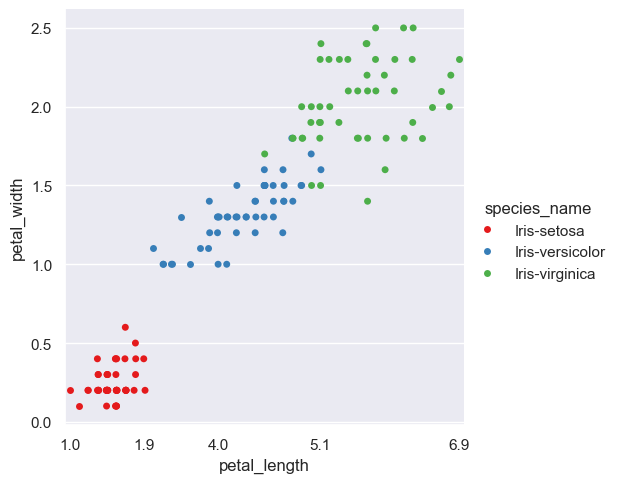

In [19]:
sns.set_theme()
g = sns.catplot(x="petal_length", y="petal_width", hue="species_name", palette='Set1', data=df2)
plt.xticks([0, 8, 16, 27, 42])

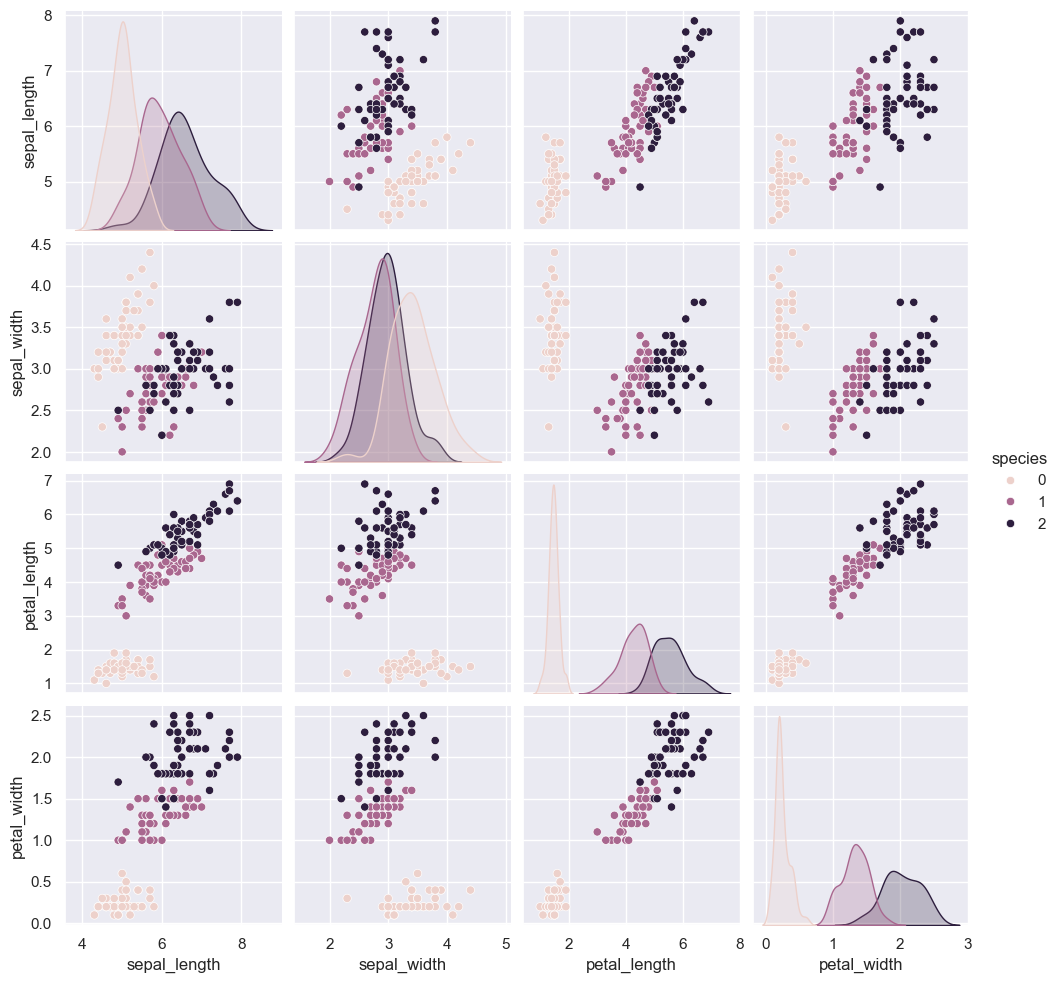

In [21]:
sns.pairplot(df_iris[['species', 'sepal_length', 'sepal_width', 'petal_length', 'petal_width']], hue = 'species')
plt.show()

In [23]:
#No need to create a test and training split this time!

In [25]:
cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
df3 = df_iris[cols]
df3

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [27]:
#Scale the iris features
features = df3[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
scaled_features = StandardScaler().fit_transform(features)

In [29]:
scaled_features

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

In [31]:
#Run the PCA model, reducing to 2 components
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(scaled_features)

In [33]:
principalComponents

array([[-2.26454173e+00,  5.05703903e-01],
       [-2.08642550e+00, -6.55404729e-01],
       [-2.36795045e+00, -3.18477311e-01],
       [-2.30419716e+00, -5.75367713e-01],
       [-2.38877749e+00,  6.74767397e-01],
       [-2.07053681e+00,  1.51854856e+00],
       [-2.44571134e+00,  7.45626750e-02],
       [-2.23384186e+00,  2.47613932e-01],
       [-2.34195768e+00, -1.09514636e+00],
       [-2.18867576e+00, -4.48629048e-01],
       [-2.16348656e+00,  1.07059558e+00],
       [-2.32737775e+00,  1.58587455e-01],
       [-2.22408272e+00, -7.09118158e-01],
       [-2.63971626e+00, -9.38281982e-01],
       [-2.19229151e+00,  1.88997851e+00],
       [-2.25146521e+00,  2.72237108e+00],
       [-2.20275048e+00,  1.51375028e+00],
       [-2.19017916e+00,  5.14304308e-01],
       [-1.89407429e+00,  1.43111071e+00],
       [-2.33994907e+00,  1.15803343e+00],
       [-1.91455639e+00,  4.30465163e-01],
       [-2.20464540e+00,  9.52457317e-01],
       [-2.77416979e+00,  4.89517027e-01],
       [-1.

In [35]:
#Make a dataframe of the new components
dfPCA = pd.DataFrame(principalComponents, columns=['PCA1', 'PCA2'])

In [37]:
dfPCA

,PCA1,PCA2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767
...,...,...
145,1.870522,0.382822
146,1.558492,-0.905314
147,1.520845,0.266795
148,1.376391,1.016362


In [39]:
#Add the species to the dataframe to show the relationship
species = [df_iris['species']]
species

[0      0
 1      0
 2      0
 3      0
 4      0
       ..
 145    2
 146    2
 147    2
 148    2
 149    2
 Name: species, Length: 150, dtype: int8]

In [41]:
dfPCA['species']= df_iris['species']

In [43]:
dfPCA

,PCA1,PCA2,species
0,-2.264542,0.505704,0
1,-2.086426,-0.655405,0
2,-2.367950,-0.318477,0
3,-2.304197,-0.575368,0
4,-2.388777,0.674767,0
...,...,...,...
145,1.870522,0.382822,2
146,1.558492,-0.905314,2
147,1.520845,0.266795,2
148,1.376391,1.016362,2


([<matplotlib.axis.XTick at 0x16acfc02b40>,
 [Text(0, 0, '-2.774169793705158'),
  Text(40, 0, '-2.044416519319802'),
  Text(80, 0, '0.6621261375659381'),
  Text(120, 0, '1.5990645856518702'),
  Text(149, 0, '')])

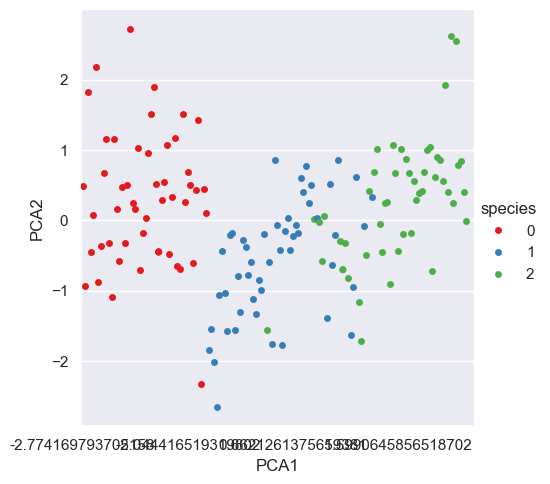

In [45]:
#PLot the two components, color coded by species
sns.set_theme()
g = sns.catplot(x="PCA1", y="PCA2", palette='Set1', hue="species", data=dfPCA)
plt.xticks([0, 40, 80, 120, 149])

In [47]:
#It's pretty easy to see the three species, even with only 2 out of 4 components!

In [49]:
#Run the PCA model, reducing to 1 component
pca = PCA(n_components=1)
principalComponents2 = pca.fit_transform(scaled_features)

In [51]:
principalComponents2

array([[-2.26454173],
       [-2.0864255 ],
       [-2.36795045],
       [-2.30419716],
       [-2.38877749],
       [-2.07053681],
       [-2.44571134],
       [-2.23384186],
       [-2.34195768],
       [-2.18867576],
       [-2.16348656],
       [-2.32737775],
       [-2.22408272],
       [-2.63971626],
       [-2.19229151],
       [-2.25146521],
       [-2.20275048],
       [-2.19017916],
       [-1.89407429],
       [-2.33994907],
       [-1.91455639],
       [-2.2046454 ],
       [-2.77416979],
       [-1.82041156],
       [-2.2282175 ],
       [-1.95702401],
       [-2.05206331],
       [-2.16819365],
       [-2.14030596],
       [-2.26879019],
       [-2.14455443],
       [-1.8319381 ],
       [-2.60820287],
       [-2.43795086],
       [-2.18867576],
       [-2.2111199 ],
       [-2.04441652],
       [-2.18867576],
       [-2.4359522 ],
       [-2.1705472 ],
       [-2.28652724],
       [-1.87170722],
       [-2.55783442],
       [-1.96427929],
       [-2.13337283],
       [-2

In [53]:
#Add the species to the dataframe to show the relationship
dfPCA2 = pd.DataFrame(principalComponents2, columns=['PCA1'])
dfPCA2['y']= 0
dfPCA2['species']= df_iris['species']
dfPCA2

,PCA1,y,species
0,-2.264542,0,0
1,-2.086426,0,0
2,-2.367950,0,0
3,-2.304197,0,0
4,-2.388777,0,0
...,...,...,...
145,1.870522,0,2
146,1.558492,0,2
147,1.520845,0,2
148,1.376391,0,2


([<matplotlib.axis.XTick at 0x16ad22479b0>,
 [Text(0, 0, '-2.774169793705158'),
  Text(40, 0, '-2.044416519319802'),
  Text(80, 0, '0.6621261375659381'),
  Text(120, 0, '1.5990645856518702'),
  Text(149, 0, '')])

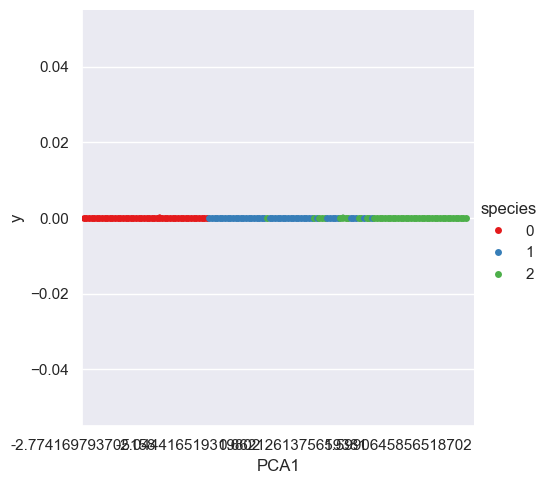

In [55]:
#PLot the component, color coded by species
sns.set_theme()
g = sns.catplot(x="PCA1", y='y', palette='Set1', hue="species", data=dfPCA2)
plt.xticks([0, 40, 80, 120, 149])

In [57]:
#Some differences are discernible even with only 1 compenent!